In [1]:
%%html
<style>
.container {width: 99% !important; }
#logo
{
    float: left;
}
#names
{
    float: right;
    
}
#logo2
{
    float: right;
    height=100;
    width=100;
    margin: 5px;
}
#top_menu
{
    margin: 20px auto 0;
    
    height:300px;
    width: 400px;
}


/* Bottom left text */
.bottom-left {
    position: absolute;
    bottom: 8px;
    left: 16px;
}

/* Top left text */
.top-left {
    position: absolute;
    top: 20px;
    left: 50px;
}

/* Top right text */
.top-right {
    position: absolute;
    top: 8px;
    right: 16px;
}

/* Bottom right text */
.bottom-right {
    position: absolute;
    bottom: 8px;
    right: 16px;
}

/* Centered text */
.centered {
    position: absolute;
    top: 50%;
    left: 50%;
    transform: translate(-50%, -50%);
}
</style>


# Pandas Cheat Sheet!

<img src="./pandas_cheat_sheet.png"/>

# Pandas Cheat Sheet!

Download it here: https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

# Working with Spatially Enabled DataFrames

- Use v1.5 of the Python API
- Spatially Enabled DataFrames 
    + Pandas DataFrames
    + Special `spatial` and `geom` namespaces
    + Has a custom `Geometry` column type

# Working with Spatially Enabled DataFrames
<center>
<img src="./pandas_globe.png"/></center>

# Getting Started

- Uses `Accessor` design pattern
    + This means a namespace will exist on the `pd.DataFrame` object


In [3]:
import seaborn as sns
import pandas as pd
from arcgis.gis import GIS
import pandas as pd
from arcgis.features import GeoAccessor, GeoSeriesAccessor 

# Loading Spatial Data

### Custom Data Reader Support:

- feature classes
    + shapefiles
    + FGDB/sqlite Feature Classes
    + SDE Feature Classes
- Feature Layers


In [4]:
item = GIS().content.get("85d0ca4ea1ca4b9abf0c51b9bd34de2e")
flayer = item.layers[0]
sdf = pd.DataFrame.spatial.from_layer(flayer) 
sdf.head()

,AGE_10_14,AGE_15_19,AGE_20_24,AGE_25_34,AGE_35_44,AGE_45_54,AGE_55_64,AGE_5_9,AGE_65_74,AGE_75_84,...,PLACEFIPS,POP2010,POPULATION,POP_CLASS,RENTER_OCC,SHAPE,ST,STFIPS,VACANT,WHITE
0,2144,2314,2002,3531,3887,5643,6353,2067,5799,2850,...,0408220,39540,40346,6,6563,"{""x"": -12751215.004681978, ""y"": 4180278.406256...",AZ,04,6703,32367
1,876,867,574,1247,1560,2122,2342,733,2157,975,...,0424895,14364,14847,6,1397,"{""x"": -12755627.731115643, ""y"": 4164465.572856...",AZ,04,1389,12730
2,1000,1003,833,2311,2063,2374,3631,1068,6165,3776,...,0425030,26265,26977,6,1963,"{""x"": -12734674.294574209, ""y"": 3850472.723091...",AZ,04,9636,22995
3,2730,2850,2194,4674,5240,7438,8440,2499,8145,4608,...,0439370,52527,55041,7,6765,"{""x"": -12725332.21151233, ""y"": 4096532.0908223...",AZ,04,9159,47335
4,2732,2965,2024,3182,3512,3109,1632,2497,916,467,...,0463470,25505,29767,6,1681,"{""x"": -12770984.257542243, ""y"": 3826624.133935...",AZ,04,572,16120


In [10]:
fs = flayer.query(where="ST = 'CO'")
fs.df

,AGE_10_14,AGE_15_19,AGE_20_24,AGE_25_34,AGE_35_44,AGE_45_54,AGE_55_64,AGE_5_9,AGE_65_74,AGE_75_84,...,PLACEFIPS,POP2010,POPULATION,POP_CLASS,RENTER_OCC,ST,STFIPS,VACANT,WHITE,SHAPE
0,7207,6915,5836,12597,14225,17423,14288,6895,8056,4897,...,0803455,106433,110675,8,11420,CO,08,1726,95612,"{'x': -11707884.39774632, 'y': 4838497.0528634..."
1,22853,21539,22180,52698,47236,43400,33670,25261,16692,8808,...,0804000,325078,347654,8,48865,CO,08,9139,198720,"{'x': -11664856.21590047, 'y': 4822287.4795402..."
2,857,752,898,1724,1541,1500,1081,913,606,331,...,0806172,11207,11972,6,1532,CO,08,260,7433,"{'x': -11691691.17365545, 'y': 4837611.6037538..."
3,1154,1156,417,607,1514,3028,2437,843,992,348,...,0806970,13116,13448,6,369,CO,08,221,12288,"{'x': -11652395.953342462, 'y': 4730396.449398..."
4,3552,10681,19814,15569,11420,10505,9318,3867,4475,2659,...,0807850,97385,101990,8,21607,CO,08,2177,85702,"{'x': -11717413.971551124, 'y': 4868269.889900..."
5,2686,2384,2100,5244,5036,4213,2982,2911,1626,884,...,0808675,33352,35912,6,3277,CO,08,599,25823,"{'x': -11661272.700450042, 'y': 4861742.663933..."
6,4016,3494,3129,7796,8965,8639,6016,4382,3108,1766,...,0809280,55889,61824,7,5917,CO,08,1232,48099,"{'x': -11695606.191425014, 'y': 4856124.442768..."
7,915,1012,909,1930,1870,2321,2153,934,1636,1181,...,0811810,16400,16132,6,2222,CO,08,655,15089,"{'x': -11715498.0124993, 'y': 4641922.88564786..."
8,1079,689,227,589,1985,1907,1223,1167,582,164,...,0812390,10360,10758,6,502,CO,08,144,9593,"{'x': -11672129.580514772, 'y': 4787822.956967..."
9,4128,3079,1798,6735,9164,6820,4138,4934,1953,719,...,0812415,48231,56389,7,3960,CO,08,938,43768,"{'x': -11670848.684352428, 'y': 4769211.700416..."


# Examining Data Types

- v1.5 introduces the `Geometry` data type
- Allows users to explicitly determine what column is geographic in nature

In [4]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3905 entries, 0 to 3904
Data columns (total 51 columns):
AGE_10_14     3905 non-null int64
AGE_15_19     3905 non-null int64
AGE_20_24     3905 non-null int64
AGE_25_34     3905 non-null int64
AGE_35_44     3905 non-null int64
AGE_45_54     3905 non-null int64
AGE_55_64     3905 non-null int64
AGE_5_9       3905 non-null int64
AGE_65_74     3905 non-null int64
AGE_75_84     3905 non-null int64
AGE_85_UP     3905 non-null int64
AGE_UNDER5    3905 non-null int64
AMERI_ES      3905 non-null int64
ASIAN         3905 non-null int64
AVE_FAM_SZ    3905 non-null float64
AVE_HH_SZ     3905 non-null float64
BLACK         3905 non-null int64
CAPITAL       3905 non-null object
CLASS         3905 non-null object
FAMILIES      3905 non-null int64
FEMALES       3905 non-null int64
FHH_CHILD     3905 non-null int64
FID           3905 non-null int64
HAWN_PI       3905 non-null int64
HISPANIC      3905 non-null int64
HOUSEHOLDS    3905 non-null int64
HSE

# Getting Subsets of Data from `SeDF`

- Services allow for the querying of data

In [5]:
q = sdf.AGE_45_54 < 1500
sdf[q].head()

,AGE_10_14,AGE_15_19,AGE_20_24,AGE_25_34,AGE_35_44,AGE_45_54,AGE_55_64,AGE_5_9,AGE_65_74,AGE_75_84,...,PLACEFIPS,POP2010,POPULATION,POP_CLASS,RENTER_OCC,SHAPE,ST,STFIPS,VACANT,WHITE
5,1413,1381,1106,2138,1815,1411,979,1557,525,307,...,0468080,14287,14980,6,1074,"{""x"": -12768343.256613126, ""y"": 3842463.708135...",AZ,04,261,9196
19,727,738,677,1380,1185,1333,1087,740,661,444,...,0602042,9932,10239,6,2056,"{""x"": -13613950.337588644, ""y"": 4931686.754090...",CA,06,267,8273
66,593,511,2323,2767,746,127,34,1229,4,2,...,0610561,10616,11869,6,2558,"{""x"": -13066582.116550362, ""y"": 3925650.676616...",CA,06,296,7530
84,888,988,900,1729,1479,1443,959,766,514,280,...,0613560,10866,11195,6,761,"{""x"": -13123874.446103057, ""y"": 4044249.710416...",CA,06,86,5898
93,1086,1228,1013,1822,1759,1478,1112,925,687,477,...,0614974,12823,13009,6,1763,"{""x"": -13151212.145276317, ""y"": 4027601.332347...",CA,06,88,6930


## Accessing Local GIS Data

The `SeDF` can also access local geospatial data. Depending upon what Python modules you have installed, you'll have access to a wide range of functionality:  

* If the **`ArcPy`** module is installed, meaning you have installed [`ArcGIS Pro`](http://pro.arcgis.com/en/pro-app/) and have installed the ArcGIS API for Python in that same environment, the `Spatial Enabled DataFrame` has methods to read a subset of the ArcGIS Desktop [supported geographic formats](http://desktop.arcgis.com/en/arcmap/10.3/manage-data/datatypes/about-geographic-data-formats.htm#ESRI_SECTION1_4835793C55C0439593A46FD5BC9E64B9), most notably:
 * [`feature classes`](http://desktop.arcgis.com/en/arcmap/latest/manage-data/feature-classes/a-quick-tour-of-feature-classes.htm)
 * [`shapefiles`](http://desktop.arcgis.com/en/arcmap/latest/manage-data/shapefiles/what-is-a-shapefile.htm),  
 * [`ArcGIS Server Web Services`](https://enterprise.arcgis.com/en/server/latest/publish-services/windows/what-types-of-services-can-you-publish.htm) and [`ArcGIS Online Hosted Feature Layers`](https://doc.arcgis.com/en/arcgis-online/share-maps/publish-features.htm) 
 * [`OGC Services`](http://www.opengeospatial.org/standards)  
* If the **ArcPy** module is not installed, the SEDF `from_featureclass` method only supports consuming an Esri [`shapefile`](http://desktop.arcgis.com/en/arcmap/latest/manage-data/shapefiles/what-is-a-shapefile.htm)
> Please note that you must install the `pyshp` package to read shapefiles in environments that don't have access to `ArcPy`.
    
### Example: Reading a Shapefile


In [6]:
sdf = (pd.DataFrame
       .spatial
       .from_featureclass("./data/cities.shp")) 
sdf.tail()

,FID,NAME,CLASS,ST,STFIPS,PLACEFIP,CAPITAL,AREALAND,AREAWATER,POP_CLASS,...,MARHH_NO_C,MHH_CHILD,FHH_CHILD,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,SHAPE
3552,3552,East Providence,City,RI,44,22960,,13.405,3.208,6,...,5658,306,1414,12850,2.99,21309,779,12096,8434,"{""x"": -71.3608270663031, ""y"": 41.8015001782688..."
3553,3553,Pawtucket,City,RI,44,54640,,8.736,0.259,7,...,6740,754,3242,18520,3.07,31819,1772,13331,16716,"{""x"": -71.3759815680945, ""y"": 41.8755001649055..."
3554,3554,Fall River,City,MA,25,23000,,31.022,7.202,7,...,9011,759,4247,23558,3.00,41857,3098,13521,25238,"{""x"": -71.1469910908576, ""y"": 41.6981001567767..."
3555,3555,Somerset,Census Designated Place,MA,25,62465,,8.109,3.867,6,...,2771,91,287,5260,2.98,7143,156,5723,1264,"{""x"": -71.15319106847441, ""y"": 41.748500174901..."
3556,3556,New Bedford,City,MA,25,45000,,20.122,3.904,7,...,8813,910,4701,24083,3.01,41511,3333,16711,21467,"{""x"": -70.93370908847608, ""y"": 41.651800155406..."


## Saving Spatially Enabled DataFrames

The `SeDF` can export data to various data formats for use in other applications.


### Export Options

- [Feature Layers](https://doc.arcgis.com/en/arcgis-online/share-maps/hosted-web-layers.htm)
- [Feature Collections](https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.features.toc.html#featurelayercollection)
- [Feature Set](https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.features.toc.html#featureset)
- [GeoJSON](http://geojson.org/)
- [Feature Class](http://desktop.arcgis.com/en/arcmap/latest/manage-data/feature-classes/a-quick-tour-of-feature-classes.htm)
- [Pickle](https://pythontips.com/2013/08/02/what-is-pickle-in-python/)


### Export to Feature Class

The `SeDF` allows for the export of whole datasets or partial datasets.  

#### Example: Export a whole dataset to a feature classes:

In [8]:
(sdf
 .spatial
 .to_featureclass(location=r"c:\temp\scratch.gdb\mycities"))

'c:\\temp\\scratch.gdb\\mycities'

#### Example: Export dataset with a subset of columns and top 5 records to a shapefile:

In [9]:
columns = ['NAME', 'ST', 'CAPITAL', 'STFIPS', 'POP2000', 'POP2007', 'SHAPE']
(sdf[columns].head()
             .spatial
             .to_featureclass(location=r"c:/temp/sdf_head_output.shp"))

'c:\\temp\\sdf_head_output.shp'

# Visualizing Spatial Data

The Spatially Enabled Dataframe has a `plot()` method that uses a syntax and symbology similar to [`matplotlib`](https://matplotlib.org) for visualizing features on a map. With this functionality, you can easily visualize aspects of your data both on a map and on a matplotlib chart using the same symbology!

Some unique characteristics of working with the visualization capabalities on the SDF:
- Uses Pythonic syntax
- Uses the same syntax as visualizing charts on Pandas DataFrames
- Uses symbology familiar to users of matplotlib
- Works on features and attributes simultaneously, eliminating to a great extent the need to iterate over all features (rows)
- Handles reading and writing to multiple formats aiding data conversion


In [10]:
from arcgis import GIS

# create an anonymous connection to ArcGIS Online and get a public item
item = GIS(verify_cert=False).content.get("85d0ca4ea1ca4b9abf0c51b9bd34de2e")
display(item)
flayer = item.layers[0]

# Specify a SQL query and get a sub-set of the original data as a DataFrame
df = flayer.query(where="AGE_45_54 < 1500", as_df=True)

# Visualize the top 5 records
df.head()

<Item title:"USA Major Cities" type:Feature Layer Collection owner:esri_dm>

,AGE_10_14,AGE_15_19,AGE_20_24,AGE_25_34,AGE_35_44,AGE_45_54,AGE_55_64,AGE_5_9,AGE_65_74,AGE_75_84,...,PLACEFIPS,POP2010,POPULATION,POP_CLASS,RENTER_OCC,SHAPE,ST,STFIPS,VACANT,WHITE
0,1413,1381,1106,2138,1815,1411,979,1557,525,307,...,0468080,14287,14980,6,1074,"{""x"": -12768343.256613126, ""y"": 3842463.708135...",AZ,04,261,9196
1,727,738,677,1380,1185,1333,1087,740,661,444,...,0602042,9932,10239,6,2056,"{""x"": -13613950.337588644, ""y"": 4931686.754090...",CA,06,267,8273
2,593,511,2323,2767,746,127,34,1229,4,2,...,0610561,10616,11869,6,2558,"{""x"": -13066582.116550362, ""y"": 3925650.676616...",CA,06,296,7530
3,888,988,900,1729,1479,1443,959,766,514,280,...,0613560,10866,11195,6,761,"{""x"": -13123874.446103057, ""y"": 4044249.710416...",CA,06,86,5898
4,1086,1228,1013,1822,1759,1478,1112,925,687,477,...,0614974,12823,13009,6,1763,"{""x"": -13151212.145276317, ""y"": 4027601.332347...",CA,06,88,6930


# Get the Data on a Map

In [15]:
m1 = GIS().map('United States')
m1

MapView(layout=Layout(height='400px', width='100%'))

In [16]:
m1.zoom = 4
m1.center = [39,-98]

In [27]:
df.spatial.plot(map_widget=m1)

True

In [29]:
df.spatial.plot(map_widget=m1,
            symbol_type='simple',
            symbol_style='d', # d - for diamonds
            colors='Greens_r',
            cstep=10,
            outline_color='Reds',
            marker_size=10)

True

# Understanding renderers

- Renderers define how to visually represent spatial data by defining symbols to represent individual features
- A `SeDF` provides you with functionality to control the way features appear by choosing the symbol the renderer uses

### Supported renderers  

Supports the following renderers:

| Renderer     	| Syntax 	| Explanation                                                                                 	|
|--------------	|--------	|---------------------------------------------------------------------------------------------	|
| Simple       	| 's'    	| renders using one symbol only (the examples in [quickstart](#quickstart) above)             	|
| Unique       	| 'u'    	| renders each unique value with a different symbol. Suitable for categorical columns         	|
| Unique       	| 'u-a'    	| renders each unique value with a different symbol using arcade expressions. Suitable for categorical columns         	|
| Class breaks 	| 'c'    	| renders each group of values with a different color or size. Suitable for numerical columns 	|
| Heatmap      	| 'h'    	| renders density of point data as raster of varying colors                                   	|


## Class Break Renderers

- Provide a symbology based on an attribute
- Classbreak symbols are numerical data

![class color renderer](http://esri.github.io/arcgis-python-api/notebooks/nbimages/guide_sdf_class_breaks_color_1.png)

## Colormaps and Colors
The examples above use the default colormap `jet`. However you can customize them by using the `colors` paramater. You can specify colors as:
 * a string representing [named colors](https://matplotlib.org/examples/color/named_colors.html)
 * an array of [RGB](http://www.tomjewett.com/colors/rgb.html) values
 * a named [color ramp](https://matplotlib.org/examples/color/colormaps_reference.html). 

#### Color Array

RGB + Alpha values can be used to create colors for symbols called in the `plot` method.  RGB stands for red, green, and blue respectively. Each RGB value is a value between 0-255, and the alpha value is a number between 0-255.

**Example to produce :**

    color = [255,0,100,1]

The above example produces a purplish color. Many websites provide details about using colors. For example, see [here](https://www.rapidtables.com/web/color/RGB_Color.html) for a color codes chart.

# Colormaps and Colors
## Colormap helpers

To better understand the syntax for each input type, the ArcGIS API for Python provides some helper functions:

```
    from arcgis.mapping import display_colormaps
    display_colormaps()
```

![colormap display](http://esri.github.io/arcgis-python-api/notebooks/nbimages/13_display_colormaps.png)

# Symbology for Simple Renderers

The ArcGIS API for Python provides you the ability to set symbol types so you control data appearance. The  `show_styles` function in the `arcgis.mapping` module assists you with the syntax to define symbols.

## Getting the different symbol styles

In [16]:
from arcgis.mapping import show_styles

In [17]:
show_styles(df.spatial.geometry_type[0])  # the DataFrame in this example is of Point type

,MARKER,ESRI_STYLE
0,o,Circle (default)
1,+,Cross
2,d,Diamond
3,s,Square
4,x,X


In [18]:
show_styles('Polygon')

,MARKER,ESRI_STYLE
0,\,Backward Diagonal
1,/,Forward Diagonal
2,|,Vertical Bar
3,-,Horizontal Bar
4,x,Diagonal Cross
5,+,Cross
6,s,Solid Fill (default)


In [19]:
show_styles('Line')

,MARKER,ESRI_STYLE
0,s,Solid (default)
1,-,Dash
2,-.,Dash Dot
3,-..,Dash Dot Dot
4,.,Dot
5,--,Long Dash
6,--.,Long Dash Dot
7,n,Null
8,s-,Short Dash
9,s-.,Short Dash Dot


In [17]:
gis = GIS()
search_result = gis.content.search('title:USA freeway system AND owner:esri', 
                                  item_type = 'Feature Layer')
freeway_item = search_result[0]
freeway_item

<Item title:"USA Freeway System" type:Feature Layer Collection owner:esri>

In [18]:
freeway_sdf = freeway_item.layers[0].query(as_df=True)
freeway_sdf.head()

,CLASS,DIST_KM,DIST_MILES,NUMBER,OBJECTID,ROUTE_NUM,SHAPE,SUFFIX
0,C,8.25588,5.12996,G8,1,CG8,"{""paths"": [[[-121.892261711658, 37.32391610061...",
1,I,31.91401,19.83041,105,2,I105,"{""paths"": [[[-118.368428716304, 33.93055610296...",
2,I,77.66011,48.25566,205,3,I205,"{""paths"": [[[-122.561879717577, 45.54969107336...",
3,I,150.36972,93.43523,215,4,I215,"{""paths"": [[[-117.319118714291, 34.14458511089...",
4,I,3.27579,2.03548,238,5,I238,"{""paths"": [[[-122.137358724846, 37.69015308551...",


In [19]:
m2 = gis.map('San Francisco')
m2

MapView(layout=Layout(height='400px', width='100%'))

In [23]:
m2.center=[34.05,-118.2]
m2.zoom=12
m2.basemap='dark-gray'

In [20]:
freeway_sdf.spatial.plot(map_widget=m2,
                     cmap='Spectral',  
                     symbol_type='simple',
                     symbol_style="--"
                    )

True

# Spatial Data Wrangling
## Case Study: Denny's Association with La Quinta

```
“La Quinta” is Spanish for “next to Denny’s.”
     -- Mitch Hedberg, comedian
```

### 1. Get the Data

In [21]:
df_dennys = pd.read_csv("https://raw.githubusercontent.com/Sta199-S18/lab-04-wrangle-space-data/master/data/dennys.csv")
df_hotel = pd.read_csv("https://raw.githubusercontent.com/Sta199-S18/lab-04-wrangle-space-data/master/data/laquinta.csv")

In [22]:
df_dennys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643 entries, 0 to 1642
Data columns (total 6 columns):
address      1643 non-null object
city         1643 non-null object
state        1643 non-null object
zip          1643 non-null int64
longitude    1643 non-null float64
latitude     1643 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 77.1+ KB


In [27]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 6 columns):
address      909 non-null object
city         909 non-null object
state        909 non-null object
zip          909 non-null object
longitude    909 non-null float64
latitude     909 non-null float64
dtypes: float64(2), object(4)
memory usage: 42.7+ KB


# Spatial Data Wrangling
### 2. Spatially Enable the Data

In [23]:
sdf_dennys = (pd.DataFrame
              .spatial
              .from_xy(df_dennys, 
                       x_column='longitude', 
                       y_column='latitude'))
sdf_hotel = (pd.DataFrame
             .spatial
             .from_xy(df_hotel, 
                      x_column='longitude', 
                      y_column='latitude'))

In [24]:
sdf_dennys.head()

,address,city,state,zip,longitude,latitude,SHAPE
0,2900 Denali,Anchorage,AK,99503,-149.8767,61.1953,"{""x"": -149.8767, ""y"": 61.1953, ""spatialReferen..."
1,3850 Debarr Road,Anchorage,AK,99508,-149.8090,61.2097,"{""x"": -149.809, ""y"": 61.2097, ""spatialReferenc..."
2,1929 Airport Way,Fairbanks,AK,99701,-147.7600,64.8366,"{""x"": -147.76, ""y"": 64.8366, ""spatialReference..."
3,230 Connector Dr,Auburn,AL,36849,-85.4681,32.6033,"{""x"": -85.4681, ""y"": 32.6033, ""spatialReferenc..."
4,224 Daniel Payne Drive N,Birmingham,AL,35207,-86.8317,33.5615,"{""x"": -86.8317, ""y"": 33.5615, ""spatialReferenc..."


In [25]:
gis = GIS()

In [26]:
m_texas = gis.map('Texas')
m_texas

MapView(layout=Layout(height='400px', width='100%'))

In [30]:
sdf_dennys.spatial.plot(map_widget=m_texas, colors='Blues_r', cstep=20)
sdf_hotel.spatial.plot(map_widget=m_texas, symbol_type='simple',
            symbol_style='s',
            colors='Reds_r',
            cstep=10,
            outline_color='Greens',
            marker_size=10)

True

# Spatial Data Wrangling
### 3. Find the Closest Denny's to La Quinta Hotel

In [32]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3958.756#6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

## Find the Closest La Quinta to a Denny's

- create a spatial index (r-tree)
- find the nearest point
- save results to a list

In [33]:
sindex_denny = sdf_dennys.spatial.sindex(stype='rtree', reset=False)
dennys_near_hotels = []
for row in df_hotel[['longitude', 'latitude', 'SHAPE']].to_records():
    row = list(row)
    g = row[3]
    source_idx = row[0]
    latlong = (row[1], row[2])
    r = [i for i in sindex_denny._index.nearest(latlong, num_results=1)]
    r = list(set(r))
    dists = [haversine(sdf_dennys['SHAPE'][i].x, sdf_dennys['SHAPE'][i].y, 
                       row[1], row[2]) for i in r]
    row = row + r + dists
    dennys_near_hotels.append(row)
 

### 4. Create Spatially Enabled DataFrame

- create a DataFrame
- set the geometry
- display the results

In [35]:
df_dist_matrix = pd.DataFrame(data=dennys_near_hotels, columns=['hotel_idx', 'latitude', 'longtiude', 
                                                                'SHAPE','dennys_idx','distance'])
df_dist_matrix.spatial.set_geometry('SHAPE')
df_dist_matrix.head()

,hotel_idx,latitude,longtiude,SHAPE,dennys_idx,distance
0,0,-76.188459,39.523216,"{""x"": -76.188459, ""y"": 39.523216, ""spatialRefe...",867,7.896402
1,1,-99.778765,32.413489,"{""x"": -99.778765, ""y"": 32.413489, ""spatialRefe...",1306,0.401129
2,2,-99.722688,32.491357,"{""x"": -99.722688, ""y"": 32.491357, ""spatialRefe...",1305,5.847841
3,3,-84.656087,34.082039,"{""x"": -84.656087, ""y"": 34.082039, ""spatialRefe...",696,14.322229
4,4,-96.636515,34.781805,"{""x"": -96.636515, ""y"": 34.781805, ""spatialRefe...",1206,44.485741


### 5. Answer the Question are La Quintas near Denny's?


In [36]:
df_dist_matrix['distance'].describe()

count     909.000000
mean       17.456487
std        64.123183
min         0.009780
25%         0.967422
50%         3.272760
75%        13.564601
max      1331.920756
Name: distance, dtype: float64

### Denny's Less than 10 Miles

- Clearly the someone can happily sleep at a La Quinta Inn and eat at a Denny's provided that they avoid the few La Quinta Inns that are not located near a Denny's
- A major are within walking distance, but some are a short ride to the location


646

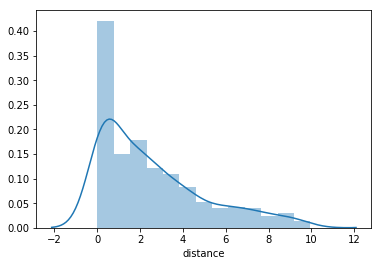

In [37]:
q = df_dist_matrix.distance <= 10
ax = sns.distplot(df_dist_matrix[q]['distance'])
len(df_dist_matrix[q])

# More Results

1. **646** out of **909** La Quintas are within 10 miles of a Denny's
2. Of the **646**, how many La Quintas are within 3 Miles: **426**

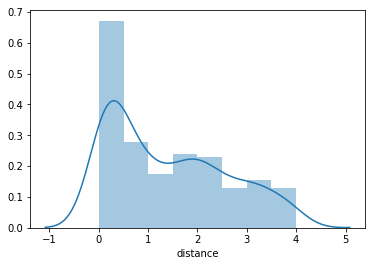

In [38]:
q = df_dist_matrix.distance < 4
ax = sns.distplot(df_dist_matrix[q].distance)

# Hypothesis Testing

- Alpha of .05
- NULL and Alternate Hypothesis as such:

$H_0 >= 4$,
$H_1 < 4$

### Remove Outliers (More than 2 Std Deviations)

In [39]:
import scipy
from scipy.stats import t
alpha = .05
mean = df_dist_matrix.distance.mean()
std = df_dist_matrix.distance.std()
final_list = [x for x in df_dist_matrix.distance if (x > mean - 2 * std)]
final_list = [x for x in final_list if (x < mean + 2 * std)]
dists = len(df_dist_matrix) - len(final_list)
ttest = scipy.stats.ttest_1samp(final_list, 4)
df = len(final_list) - 1 # Degrees of Freedom
t_stat = ttest.statistic # t-test value
p_value = ttest.pvalue / 2 # One Tailed T-Test p-value
t_critical = t.ppf(1-alpha, df) # t-critical 1-tailed
vals = (df, t_stat, p_value, t_critical)
print("Removed: %s distances." % (dists))
print(vals)

Removed: 10 distances.
(898, 11.814986885850276, 2.4068332704705434e-30, 1.6465522370683594)


# Assess the Hypotheses

### Recall: 

<br/>
$H_0 >= 4$ <br/>
$H_1 < 4$ <br/>


### Test Statistic:

**11.815**

### p-value:

**2.407e-30**

### Decision/Conclusion:

Because $t = 11.815 > 1.647$ $H_0$ rejected, or we can reject $H_0$ because the p-value is less than $.05$

This means Mitch Hedberg observation was **correct** and Denny's appear to be close to **La Quinta**
